# Veri Analizi

**Veri Setinin Tanımı**

Bu veri seti, 33'ü doğrusal değerli ve biri nominal olan 34 öznitelik içerir.

Eritematöz skuamöz hastalıkların ayırıcı tanısı dermatolojide gerçek bir problemdir.
Hepsi çok az farkla eritem ve ölçeklenmenin klinik özelliklerini paylaşır. Bu gruptaki hastalıklar sedef hastalığı, seboreik dermatit, liken planus, pityriasis rosea, kronik dermatit ve pityriasis rubra pilaris'dir.

Tanı için genellikle biyopsi gerekir ancak maalesef bu hastalıklar pek çok histopatolojik özelliği de paylaşmaktadır. Ayırıcı tanı için bir diğer zorluk, bir hastalığın başlangıç aşamasında başka bir hastalığın özelliklerini gösterebilmesi ve sonraki aşamalarda da karakteristik özelliklere sahip olabilmesidir.

Hastalar ilk olarak 12 özellik ile klinik olarak değerlendirilmiş. Ardından 22 histopatolojik özelliğin değerlendirilmesi için deri örnekleri alınmış. Histopatolojik özelliklerin değerleri, örneklerin mikroskop altında analizi ile belirlenmiştir.

Bu konu için oluşturulan veri setinde, aile öyküsü özelliği, bu hastalıklardan herhangi biri ailede görülmüşse 1, aksi halde 0 değerine sahiptir.

Yaş özelliği basitçe hastanın yaşını temsil eder. Diğer her özellik için (klinik ve histopatolojik), 0 ila 3 arasında bir derece verilmiştir.

Burada 0, özelliğin mevcut olmadığını, 3 olası en yüksek miktarı ve 1, 2 göreceli ara değerleri gösterir.

## Veri Setinin İçeriği
<br>
<br>
Veri sayısı: 366

Öznitelik sayısı: 34

Özniteliği eksik veri sayısı: 8 (yaş özniteliği eksik). Eksik veriler '?' ile temsil edilmiştir.
<br>
<br>
### Öznitelik Bilgileri:
<br>

#### Sınıf Bilgisi: (1,2,3,4,5,6)
35 : class code
<br>
<br>
#### Klinik Öznitelikler: (0, 1, 2, 3, değerlerini alır)
<ul>
<li>1: erythema</li>
<li>2: scaling</li>
<li>3: definite borders</li>
<li>4: itching</li>
<li>5: koebner phenomenon</li>
<li>6: polygonal papules</li>
<li>7: follicular papules</li>
<li>8: oral mucosal involvement</li>
<li>9: knee and elbow involvement</li>
<li>10: scalp involvement</li>
<li>11: family history, (0 veya 1)</li>
<li>34: Age (linear)</li>
</ul>
<br>

#### Histopatolojik Öznitelikler: (0, 1, 2, 3)
<ul>
<li>12: melanin incontinence</li>
<li>13: eosinophils in the infiltrate</li>
<li>14: PNL infiltrate</li>
<li>15: fibrosis of the papillary dermis</li>
<li>16: exocytosis</li>
<li>17: acanthosis</li>
<li>18: hyperkeratosis</li>
<li>19: parakeratosis</li>
<li>20: clubbing of the rete ridges</li>
<li>21: elongation of the rete ridges</li>
<li>22: thinning of the suprapapillary epidermis</li>
<li>23: spongiform pustule</li>
<li>24: munro microabcess</li>
<li>25: focal hypergranulosis</li>
<li>26: disappearance of the granular layer</li>
<li>27: vacuolisation and damage of basal layer</li>
<li>28: spongiosis</li>
<li>29: saw-tooth appearance of retes</li>
<li>30: follicular horn plug</li>
<li>31: perifollicular parakeratosis</li>
<li>32: inflammatory monoluclear inflitrate</li>
<li>33: band-like infiltrate</li>
</ul>
<br>

Sınıf Dağılımı:<br>
       
       Class code:   Class:                  Number of instances:
       1             psoriasis			           112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20

In [89]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/dermatology.data', sep=",", header=None, names=[x for x in range(1,36)])
print("Veri seti örneği:")
df.head()

Veri seti örneği:


,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


**Eksik verilerin giderilmesi**

Yaş bilgileri eksik olan toplam 8 verimiz mevcut.


Ait oldukları sınıfların ortalama değerlerini atayacağız. 

In [90]:
temp_df = df[df[34] != '?']
temp_df[34] = pd.to_numeric(temp_df[34])
class_mean_values = temp_df.groupby([35]).mean()[34].values
class_mean_values = class_mean_values.astype('int')
class_mean_values

<ipython-input-90-cbdf4998fb8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[34] = pd.to_numeric(temp_df[34])


array([39, 35, 39, 35, 36, 10])

In [91]:
for i in range(6):
    df.loc[(df[34] == '?') & (df[35] == i+1), 34] = class_mean_values[i]

df.head(50)

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [92]:
df[34] = pd.to_numeric(df[34])

Özniteliklerin sınıflamadaki ayırt ediciliklerinin hesaplanması:

In [93]:
array = df.values
X = array[:,0:34]
Y = array[:,34]

from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])

# for i in range(len(fit.scores_)):
#     print('Feature %d: %f' % (i, fit.scores_[i]))

Büyükten küçüğe sıralanması:

In [94]:
scores = fit.scores_
feature_numbers = scores.argsort()
sorted_scores = np.sort(scores)[::-1] / scores.sum()

print("Feature Importances:")
for i in range(len(scores)):
    print(f'Feature {feature_numbers[i] +1}: {sorted_scores[i]}')


Feature Importances:
Feature 32: 0.14409160053589629
Feature 18: 0.10071923501621637
Feature 17: 0.087559408702455
Feature 13: 0.08621616879618128
Feature 1: 0.07519350627736006
Feature 34: 0.06637610007581414
Feature 11: 0.05792825867098661
Feature 2: 0.05462016732331319
Feature 19: 0.04418978625181611
Feature 23: 0.04389937831429659
Feature 4: 0.042773027129077254
Feature 26: 0.036177666049101616
Feature 5: 0.02964243326480463
Feature 3: 0.02640922799954623
Feature 14: 0.014120434364909774
Feature 24: 0.01354532911288131
Feature 10: 0.011136135798283884
Feature 28: 0.01108416686821952
Feature 16: 0.007858086736075373
Feature 9: 0.00634340853871296
Feature 7: 0.005306883309711785
Feature 30: 0.0044624481974810904
Feature 21: 0.0044397666779505685
Feature 22: 0.004086976098273841
Feature 20: 0.004016868531973653
Feature 8: 0.003681431832855444
Feature 25: 0.0034491543692828646
Feature 15: 0.0023209363144372584
Feature 12: 0.0019863895610051046
Feature 6: 0.001676500440539253
Feature 31

0.001'den düşük ayırt edicilik skoruna sahip olan feature 33 değerlerinin veriden çıkartılmasına karar verildi.

In [95]:
df = df.drop([33], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,8,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,26,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,45,3


Veri setindeki 34 numaralı yaş özniteliği haricindeki öznitelikler, [1,2,3] değerlerini aldığından aykırı değer analizi veri setinin kullanılamaz hale gelmesine sebep olmaktadır.

In [96]:
lower_upper_bounds = []
for col in df.columns[:-1]: 
    data = df[col].tolist()

    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    #print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    lower_upper_bounds.append((lower,upper))
    
#     df = df[(df[col] >= lower) & (df[col] <= upper)]
#     print(f'After detecting outliers on column:{col} Data shape:{df.shape}')
#     # identify outliers
#     outliers = [x for x in data if x < lower or x > upper]
#     print('Identified outliers: %d' % len(outliers))
#     # remove outliers
#     outliers_removed = [x for x in data if x >= lower and x <= upper]
#     print(f'Column:{col} Non-outlier observations: {len(outliers_removed)}')
#     #print(outliers_removed)
#     break

Her özellik için aykırı değer analizi sonrası adım adım toplamda kaç veri kaldığı gösterilmiştir.

In [97]:
outlier_df = df
for index, col in enumerate(df.columns[:-1]):
    lower, upper = lower_upper_bounds[index]
    outlier_df = outlier_df[(outlier_df[col] >= lower) & (outlier_df[col] <= upper)]
    print(f'Özellik:{col} için aykırı değer analizi sonrası verisetinin şekli:{outlier_df.shape}')
    

Özellik:1 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:2 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:3 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:4 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:5 için aykırı değer analizi sonrası verisetinin şekli:(203, 34)
Özellik:6 için aykırı değer analizi sonrası verisetinin şekli:(163, 34)
Özellik:7 için aykırı değer analizi sonrası verisetinin şekli:(143, 34)
Özellik:8 için aykırı değer analizi sonrası verisetinin şekli:(142, 34)
Özellik:9 için aykırı değer analizi sonrası verisetinin şekli:(129, 34)
Özellik:10 için aykırı değer analizi sonrası verisetinin şekli:(125, 34)
Özellik:11 için aykırı değer analizi sonrası verisetinin şekli:(113, 34)
Özellik:12 için aykırı değer analizi sonrası verisetinin şekli:(113, 34)
Özellik:13 için aykırı değer analizi sonrası verisetinin şekli:(99, 34)
Özellik:14 için aykırı değer analizi sonrası verisetinin şekl

In [98]:
outlier_df

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,55,2
9,2,2,1,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2,30,4
70,2,2,2,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,34,2
76,2,2,2,1,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,33,2
82,2,1,1,2,0,0,0,0,0,0,...,0,0,0,3,0,0,0,3,27,2
96,2,2,1,2,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,35,2
116,2,2,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,27,2
140,2,2,1,2,2,0,0,0,0,0,...,0,0,0,2,0,0,0,2,20,2
148,2,2,2,0,2,0,0,0,0,0,...,0,0,0,2,0,0,0,1,30,4
149,2,3,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,45,2


Verisetindeki 33 özellik için aykırı değer analizi yapılmıştır. Elde edilen sonuçlarda başlangıçta 366 satır olan veri, 27 satıra düştüğü için aykırı değer analizi ile veri atılmamasına karar verilmiştir.

## Sınıflama

In [99]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [100]:
X = df.iloc[:,:-1].values
# Now let's tell the dataframe which column we want for the target/labels.  
y = df[35].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=28)

In [101]:
Gaussian_model = GaussianNB()
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

Gaussian_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

Gaussian_prediction = Gaussian_model.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [102]:
# Accuracy score is the simplest way to evaluate
print(f'SVC accuracy: {100*(accuracy_score(SVC_prediction, y_test)):.2f}%')
print(f'KNN accuracy: {100*(accuracy_score(KNN_prediction, y_test)):.2f}%')
print(f'GaussianNB accuracy: {100*(accuracy_score(Gaussian_prediction, y_test)):.2f}%')

SVC accuracy: 63.51%
KNN accuracy: 89.19%
GaussianNB accuracy: 94.59%


In [103]:
# print(classification_report(KNN_prediction, y_test))

In [104]:
def plot_ccm(models):
    class_names = [x for x in range(1,7)]
    for model in models:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greens,
                                     #normalize=normalize,
                                    ax = ax)
        disp.ax_.set_title(type(model).__name__ + " - Confusion matrix")

    plt.show()

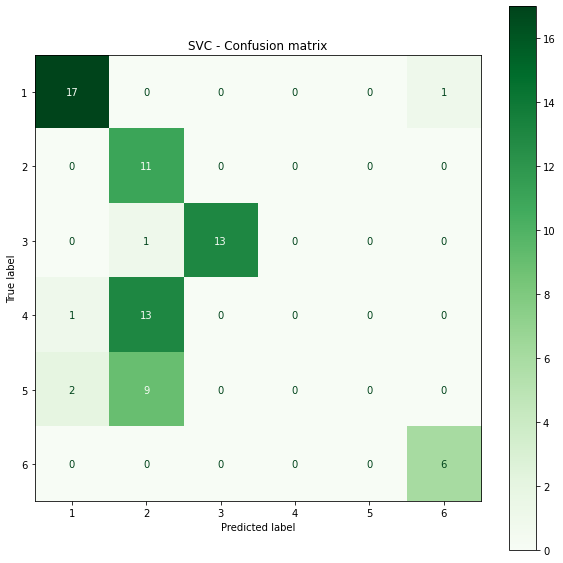

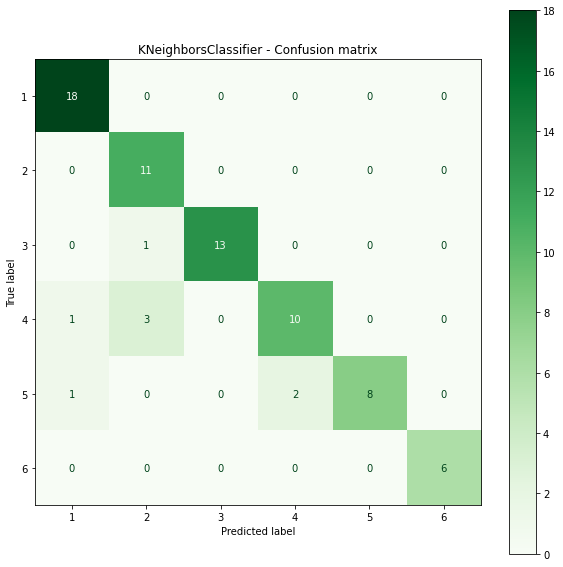

In [105]:
plot_ccm([SVC_model, KNN_model, Gaussian_model])

In [106]:
from sklearn.cluster import  AgglomerativeClustering, KMeans

kmeans = KMeans(n_clusters=6, verbose=0)
kmeans.fit(X)

ward = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
ward.fit_predict(X)

complete = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
complete.fit_predict(X)

average = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
average.fit_predict(X)

single = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
single.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
def evaluate_clusters(cluster_labels, true_labels):
    dominant_labels = {}
    for i in range(6):
        counts = np.zeros(7)
        indexes = np.where(cluster_labels == i)[0]
        for j in indexes:
            counts[true_labels[j]] += 1
        #print(f'counts:{counts}')
        dominant_labels[i] = counts.argmax()
        
    print(f'{{cluster_number:dominant_label}}\n{dominant_labels}') 
    count = 0
    for i in range(len(cluster_labels)):
        if dominant_labels[cluster_labels[i]] == true_labels[i]:
            count += 1
    return 100*(count/len(true_labels))


In [108]:
result = evaluate_clusters(kmeans.labels_, y)
print(f'K means accuracy:{result:.2f}%\n')

result = evaluate_clusters(ward.labels_, y)
print(f'Agglomerative Ward accuracy:{result:.2f}%\n')

result = evaluate_clusters(complete.labels_, y)
print(f'Agglomerative Complete accuracy:{result:.2f}%\n')

result = evaluate_clusters(average.labels_, y)
print(f'Agglomerative Average accuracy:{result:.2f}%\n')

result = evaluate_clusters(single.labels_, y)
print(f'Agglomerative Single accuracy:{result:.2f}%')

{cluster_number:dominant_label}
{0: 1, 1: 1, 2: 6, 3: 1, 4: 1, 5: 1}
K means accuracy:34.43%

{cluster_number:dominant_label}
{0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 6}
Agglomerative Ward accuracy:33.88%

{cluster_number:dominant_label}
{0: 1, 1: 1, 2: 1, 3: 6, 4: 1, 5: 1}
Agglomerative Complete accuracy:31.97%

{cluster_number:dominant_label}
{0: 1, 1: 1, 2: 3, 3: 1, 4: 6, 5: 1}
Agglomerative Average accuracy:36.89%

{cluster_number:dominant_label}
{0: 1, 1: 1, 2: 3, 3: 1, 4: 3, 5: 1}
Agglomerative Single accuracy:31.97%


En başarılı 3 clustering methodu sırasıyla Agglomerative Average, K means, Agglomerative Ward olmuştur